In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:/Users/welcome/Downloads/archive/Electric_Vehicle_Population_Size_History_By_County_.csv')
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Ensure consistency of counts
df['EV_Total_Check'] = df['Battery Electric Vehicles (BEVs)'] + df['Plug-In Hybrid Electric Vehicles (PHEVs)']
inconsistent_counts = df[df['EV_Total_Check'] != df['Electric Vehicle (EV) Total']]
print("Inconsistent counts:\n", inconsistent_counts)

# Drop the check column as it's no longer needed
df.drop(columns=['EV_Total_Check'], inplace=True)


Missing values:
 Date                                           0
County                                        86
State                                         86
Vehicle Primary Use                            0
Battery Electric Vehicles (BEVs)               0
Plug-In Hybrid Electric Vehicles (PHEVs)       0
Electric Vehicle (EV) Total                  700
Non-Electric Vehicle Total                     0
Total Vehicles                              6840
Percent Electric Vehicles                   6840
dtype: int64
Inconsistent counts:
             Date          County State Vehicle Primary Use  \
0     2022-09-30       Riverside    CA           Passenger   
1     2022-12-31  Prince William    VA           Passenger   
2     2020-01-31          Dakota    MN           Passenger   
3     2022-06-30           Ferry    WA               Truck   
4     2021-07-31         Douglas    CO           Passenger   
...          ...             ...   ...                 ...   
20814 2023-01-31      Ro

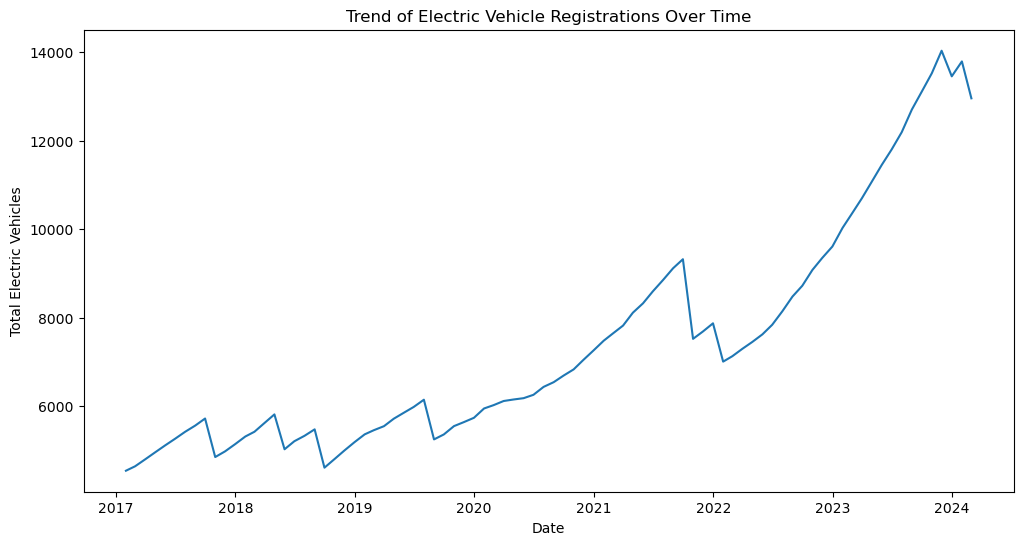

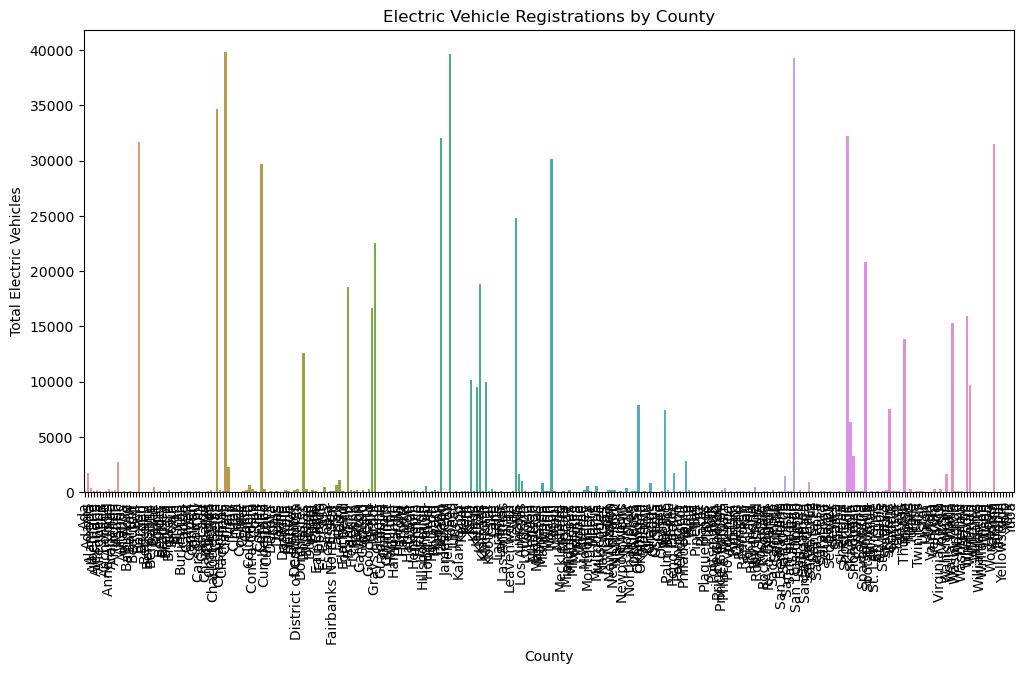

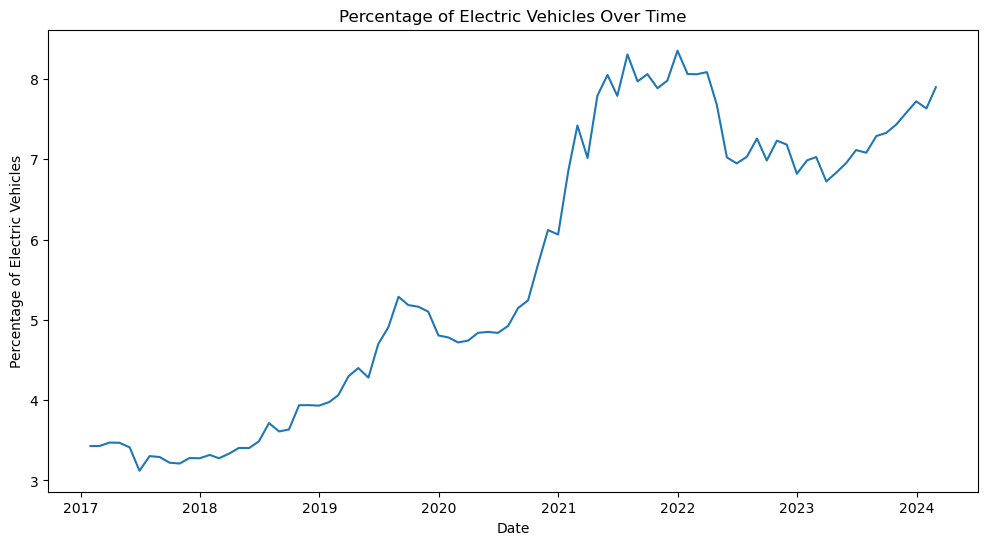

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric
df['Electric Vehicle (EV) Total'] = pd.to_numeric(df['Electric Vehicle (EV) Total'], errors='coerce')
df['Total Vehicles'] = pd.to_numeric(df['Total Vehicles'], errors='coerce')

# Trend of Electric Vehicle Registrations Over Time
df['Date'] = pd.to_datetime(df['Date'])
trend_data = df.groupby('Date')['Electric Vehicle (EV) Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(trend_data['Date'], trend_data['Electric Vehicle (EV) Total'])
plt.title('Trend of Electric Vehicle Registrations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Electric Vehicles')
plt.show()

# Electric Vehicle Registrations by County
county_data = df.groupby('County')['Electric Vehicle (EV) Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=county_data, x='County', y='Electric Vehicle (EV) Total')
plt.title('Electric Vehicle Registrations by County')
plt.xlabel('County')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=90)
plt.show()

# Percentage of electric vehicles over time
df['Percent Electric Vehicles'] = (df['Electric Vehicle (EV) Total'] / df['Total Vehicles']) * 100
percent_trend_data = df.groupby('Date')['Percent Electric Vehicles'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(percent_trend_data['Date'], percent_trend_data['Percent Electric Vehicles'])
plt.title('Percentage of Electric Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Electric Vehicles')
plt.show()
